In [1]:
#
# Student Names - Charudatta Deshpande, Manas Thakre
#
#############################################
# Import required libraries.                # 
#############################################
#
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import os as os  
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import tree
from nltk.stem import PorterStemmer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
os.chdir('C:\\Users\deshc\Desktop\INFX 574 Data Science 2\Problem Set 4')

C:\Users\deshc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deshc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#
#############################################
# Read email data file.                     # 
#############################################
#
data = pd.read_excel('data.xlsx')
data.head()

,Category,Subject,multimedia,HTML
0,Ham,Account Balance Alert,No,No
1,Ham,Your SBI Card ELITE Monthly Statement -Feb,Yes,Yes
2,Ham,Reset your password,Yes,No
3,Ham,File your Income Tax Return for AY 2016-17,No,No
4,Ham,GST Invoice For the Month of Jan-2018 for XXXX...,Yes,Yes


In [11]:
#
#############################################
# Randomize Data                            # 
#############################################
#
data = data.reindex(np.random.permutation(data.index))

In [12]:
# 
# Now we create test data and training data
# Training data size = 70% 
# 
x_train , x_test = train_test_split(data,test_size=0.3) 
#
# Analyze how many spam and ham values exist in training and testing data
#
print('Training Data Counts: \n', x_train['Category'].value_counts())
print('Test Data Counts: \n', x_test['Category'].value_counts())

Training Data Counts: 
 Spam    63
Ham     62
Name: Category, dtype: int64
Test Data Counts: 
 Spam    28
Ham     26
Name: Category, dtype: int64


In [13]:
#
# Using CountVectorizer function, split text data into vectors 
#
count_vectorizer = CountVectorizer()
vectored_text = count_vectorizer.fit_transform(x_train['Subject'].values)
vectored_text.get_shape

<bound method spmatrix.get_shape of <125x583 sparse matrix of type '<class 'numpy.int64'>'
	with 890 stored elements in Compressed Sparse Row format>>

In [14]:
#
# Explore First option 
# Use Naive Bayes, fit an example and test results. 
#
example_naive_bayes = MultinomialNB()
targets = x_train['Category'].values
example_naive_bayes.fit(vectored_text, targets)
examples = ['Hiring for Analytics Professionals @ Novartis, Hyderabad', 
            "Trend Report: New York Fashion Week'18"]
example_counts = count_vectorizer.transform(examples)
predictions_naive_bayes = example_naive_bayes.predict(example_counts)
predictions_naive_bayes
#
# End of Sample testing
#

array(['Ham', 'Spam'],
      dtype='<U4')

In [15]:
#
#################        METHOD 1 - Naive Bayes      ######################
#
# Using Pipeline, combine outputs from CountVectorizer and MultinomialNB.  
#
naive_bayes = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

In [16]:
#
# Using K-fold sampling, train the naive_bayes model on training data  
#
k_fold_train = KFold(n=len(x_train), n_folds=6)
for train_indices, test_indices in k_fold_train:
    train_text = x_train.iloc[train_indices]['Subject'].values
    train_y = x_train.iloc[train_indices]['Category'].values
    naive_bayes.fit(train_text, train_y) 

In [17]:
#
# This code will predict the model developed above. 
# Define test data and store predictions
#
y = x_test['Category']
y_test = x_test['Subject']
predictions = naive_bayes.predict(y_test)
confusion = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
print('Total emails classified using Naive Bayes on test data: ', len(x_test))
print('Accuracy using Naive Bayes on test data: ', accuracy)
print('Confusion matrix for Naive Bayes on test data: \n', confusion)

Total emails classified using Naive Bayes on test data:  54
Accuracy using Naive Bayes on test data:  0.777777777778
Confusion matrix for Naive Bayes on test data: 
 [[21  5]
 [ 7 21]]


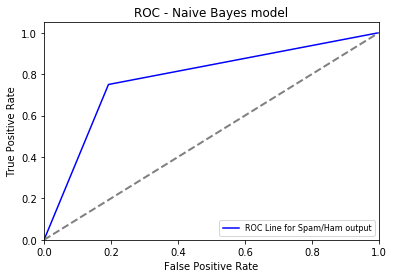

Calculated AUC for Naive Bayes model is:  0.778846153846


In [18]:
#
# Binarize the output and predictions
#
y_binary = label_binarize(y, classes=['Ham', 'Spam'])
predictions_binary = label_binarize(predictions, classes=['Ham', 'Spam'])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_binary, predictions_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)
#
# Plot the ROC Curve
#
plt.title('ROC - Naive Bayes model')
plt.plot(false_positive_rate, true_positive_rate, c='blue', label=('ROC Line for Spam/Ham output'))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Calculated AUC for Naive Bayes model is: ', roc_auc)


Confusion matrix for Naive Bayes on test data: 
 [[21  5]
 [ 7 21]]


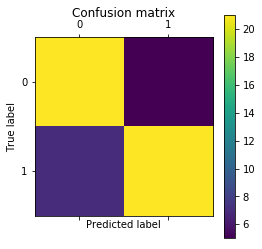

In [20]:
#
# Plot Confusion Matrix. 
#
print('Confusion matrix for Naive Bayes on test data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
#
# Explore second option 
# Use decision trees, fit an example and test results. 
#
example_decision_tree = tree.DecisionTreeClassifier()
targets = x_train['Category'].values
example_decision_tree.fit(vectored_text, targets)
examples = ['Hiring for Analytics Professionals @ Novartis, Hyderabad', 
            "Trend Report: New York Fashion Week'18"]
example_counts = count_vectorizer.transform(examples)
predictions_tree = example_decision_tree.predict(example_counts)
predictions_tree
#
# End of Sample testing
#

array(['Ham', 'Spam'], dtype=object)

In [22]:
#
#################        METHOD 2 - Decision Tree      ######################
#
# Using Pipeline, combine outputs from CountVectorizer and tree.DecisionTreeClassifier.  
#
decision_tree = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  tree.DecisionTreeClassifier())])

In [23]:
#
# Using K-fold sampling, train the decision_tree model on training data  
#
k_fold_train = KFold(n=len(x_train), n_folds=5)
for train_indices, test_indices in k_fold_train:
    train_text = x_train.iloc[train_indices]['Subject'].values
    train_y = x_train.iloc[train_indices]['Category'].values
    decision_tree.fit(train_text, train_y) 

In [24]:
#
# This code will predict the model developed above. 
# Define test data and store predictions
#
y = x_test['Category']
y_test = x_test['Subject']
predictions = decision_tree.predict(y_test)
confusion = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
print('Total emails classified using Decision Tree on test data: ', len(x_test))
print('Accuracy using Decision Tree on test data: ', accuracy)
print('Confusion matrix for Decision Tree on test data: \n', confusion)

Total emails classified using Decision Tree on test data:  54
Accuracy using Decision Tree on test data:  0.648148148148
Confusion matrix for Decision Tree on test data: 
 [[24  2]
 [17 11]]


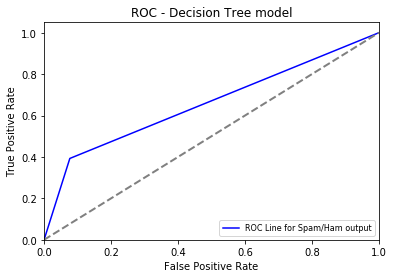

Calculated AUC for Decision Tree model is:  0.657967032967


In [25]:
#
# Binarize the output and predictions
#
y_binary = label_binarize(y, classes=['Ham', 'Spam'])
predictions_binary = label_binarize(predictions, classes=['Ham', 'Spam'])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_binary, predictions_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)
#
# Plot the ROC Curve
#
plt.title('ROC - Decision Tree model')
plt.plot(false_positive_rate, true_positive_rate, c='blue', label=('ROC Line for Spam/Ham output'))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Calculated AUC for Decision Tree model is: ', roc_auc)

Confusion matrix for Decision Tree on test data: 
 [[24  2]
 [17 11]]


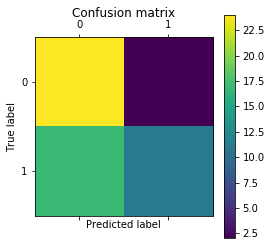

In [27]:
#
# Plot Confusion Matrix. 
#
print('Confusion matrix for Decision Tree on test data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
#
# Explore third option 
# Use Nearest Neighbors, fit an example and test results. 
#
example_knn = KNeighborsClassifier()
targets = x_train['Category'].values
example_knn.fit(vectored_text, targets)
examples = ['Hiring for Analytics Professionals @ Novartis, Hyderabad', 
            "Trend Report: New York Fashion Week'18"]
example_counts = count_vectorizer.transform(examples)
predictions_knn = example_knn.predict(example_counts)
predictions_knn
#
# End of Sample testing
#

array(['Ham', 'Spam'], dtype=object)

In [29]:
#
#################        METHOD 3 - K Nearest Neighbors     ######################
#
# Using Pipeline, combine outputs from CountVectorizer and KNeighborsClassifier.  
#
supervised_knn = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  KNeighborsClassifier())])

In [30]:
#
# Using K-fold sampling, train the supervised_knn model on training data  
#
k_fold_train = KFold(n=len(x_train), n_folds=4)
for train_indices, test_indices in k_fold_train:
    train_text = x_train.iloc[train_indices]['Subject'].values
    train_y = x_train.iloc[train_indices]['Category'].values
    supervised_knn.fit(train_text, train_y) 

In [31]:
#
# This code will predict the model developed above. 
# Define test data and store predictions
#
y = x_test['Category']
y_test = x_test['Subject']
predictions = supervised_knn.predict(y_test)
confusion = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
print('Total emails classified using Supervised KNN on test data: ', len(x_test))
print('Accuracy using Supervised KNN on test data: ', accuracy)
print('Confusion matrix for Supervised KNN on test data: \n', confusion)

Total emails classified using Supervised KNN on test data:  54
Accuracy using Supervised KNN on test data:  0.574074074074
Confusion matrix for Supervised KNN on test data: 
 [[24  2]
 [21  7]]


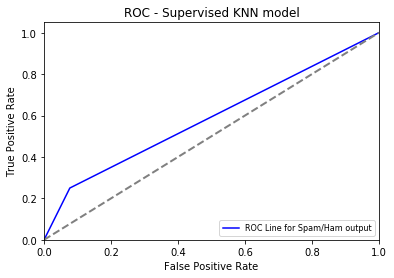

Calculated AUC for Supervised KNN model is:  0.586538461538


In [32]:
#
# Binarize the output and predictions
#
y_binary = label_binarize(y, classes=['Ham', 'Spam'])
predictions_binary = label_binarize(predictions, classes=['Ham', 'Spam'])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_binary, predictions_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)
#
# Plot the ROC Curve
#
plt.title('ROC - Supervised KNN model')
plt.plot(false_positive_rate, true_positive_rate, c='blue', label=('ROC Line for Spam/Ham output'))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Calculated AUC for Supervised KNN model is: ', roc_auc)

Confusion matrix for Supervised KNN on test data: 
 [[24  2]
 [21  7]]


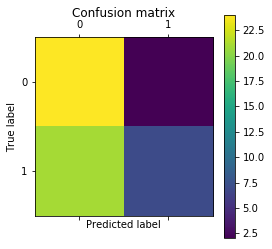

In [33]:
#
# Plot Confusion Matrix. 
#
print('Confusion matrix for Supervised KNN on test data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
############           SUMMARY OF MODELS            #############
############   REFER TO REPORT SUBMITTED IN CANVAS  ############# 